In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import fsps
from grizli import multifit
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
from grizli.utils import SpectrumTemplate
from scipy.integrate import quad 
import os

import warnings
warnings.simplefilter("ignore")

os.chdir('..')

In [2]:
def L_nu_per_M(l_aa, lam, z, Av, m_star):
    c = 3E18 # speed of light in angstrom
    lam_0 = lam / (1 + z) # restframe wavelenth in angstrom
    dust = 10**(-0.4*Av)
    return ((lam_0**2)/(c * m_star)) * l_aa * dust * 3.839E33

def F_nu_per_M(l_aa, lam, z, Av, m_star):
    conv = 3.086E24 # conversion of Mpc to cm
    D_l = cosmo.luminosity_distance(z).value # in Mpc
    return (1 + z) * L_nu_per_M(l_aa, lam, z, Av, m_star)  / (4 * np.pi * (D_l*conv)**2)

def F_lam_per_M(l_aa, lam, z, Av, m_star):
    c = 3E18 # speed of light in angstrom
    return (c / lam**2) * F_nu_per_M(l_aa, lam, z, Av, m_star)

In [3]:
sp = fsps.StellarPopulation(zcontinuous=1,sfh=4, imf_type=1, logzsol=0.0, dust_type=2, dust2=0.0, add_neb_emission=True)
sp.params['cloudy_dust'] = True
sp.params['gas_logu'] = -3
sp.params['add_igm_absorption'] = True
sp.params['add_neb_emission'] = True
sp.params['add_neb_continuum'] = True

In [4]:
sp.params['tau'] = 0.1

In [5]:
specz = 1
lam, spec = sp.get_spectrum(tage = 4, peraa=True)
flam = F_lam_per_M(spec, lam, specz, 0, sp.stellar_mass)

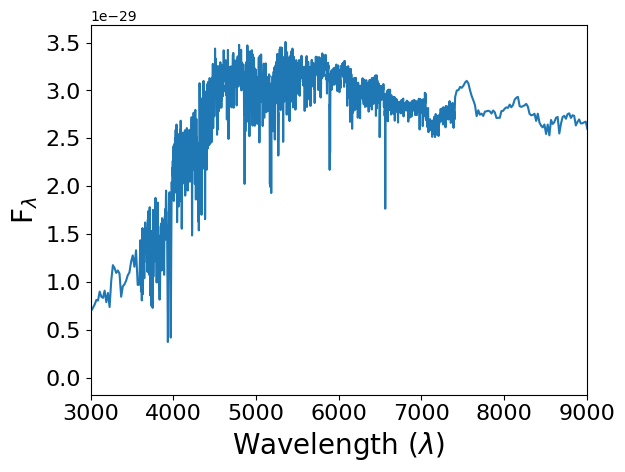

In [6]:
plt.plot(lam, flam)
plt.xlim(3000,9000)
plt.xlabel('Wavelength ($\lambda$)', fontsize = 20)
plt.ylabel('F$_\lambda$', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=16)

In [7]:
#load the beam NGDEEP_01236
mb_01236 = multifit.MultiBeam('0.5_1.0_updated/ngdeep_01236.beams.fits')

load_master_fits: 0.5_1.0_updated/ngdeep_01236.beams.fits


 !! Shift GR150C.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
1 jw02079004002_11101_00001_nis_rate.fits GR150C
2 jw02079001001_11101_00001_nis_rate.fits GR150C
3 jw02079001001_03101_00002_nis_rate.fits GR150R
4 jw02079004002_03101_00002_nis_rate.fits GR150R
5 jw02079001002_05101_00002_nis_rate.fits GR150C
6 jw02079004001_05101_00002_nis_rate.fits GR150C
 !! Shift GR150R.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
7 jw02079001002_09101_00001_nis_rate.fits GR150R
8 jw02079004001_09101_00001_nis_rate.fits GR150R
9 jw02079004002_05101_00003_nis_rate.fits GR150C
 !! Shift GR150R.F200W.220725.conf along dispersion
10 jw02079001003_03101_00001_nis_rate.fits GR150R
11 jw02079001001_05101_00003_nis_rate.fits GR150C
12 jw02079004001_03101_00003_nis_rate.fits GR150R
 !! Shift GR150C.F200W.220725.conf along dispersion
13 jw02079004003_05101_00001_nis_rate.fits GR150C

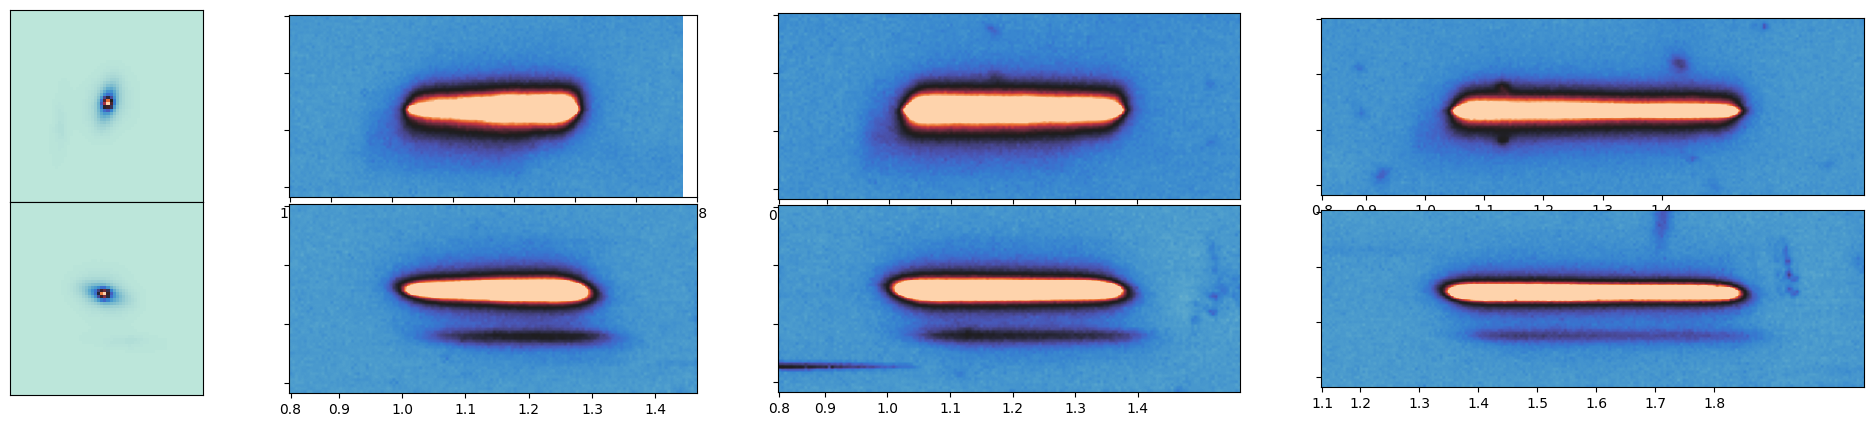

In [8]:
#2d grism of NGDEEP 01298
Idict = {}

for b in mb_01236.beams:
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        Idict[f'R-{b.grism.filter}'] = np.zeros(b.beam.sh)
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        Idict[f'C-{b.grism.filter}'] = np.zeros(b.beam.sh)
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
for b in mb_01236.beams:
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
        Idict[f'R-{b.grism.filter}'] += b.beam.direct
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
        Idict[f'C-{b.grism.filter}'] += b.beam.direct
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))

        
stk_115C = sum(np.array(Idict['F115W-GR150C']) * np.array(Idict['F115W-GR150C_err']) )/sum(np.array(Idict['F115W-GR150C_err'])) 
stk_115R = sum(np.array(Idict['F115W-GR150R']) * np.array(Idict['F115W-GR150R_err']) )/sum(np.array(Idict['F115W-GR150R_err'])) 
stk_150C = sum(np.array(Idict['F150W-GR150C']) * np.array(Idict['F150W-GR150C_err']) )/sum(np.array(Idict['F150W-GR150C_err'])) 
stk_150R = sum(np.array(Idict['F150W-GR150R']) * np.array(Idict['F150W-GR150R_err']) )/sum(np.array(Idict['F150W-GR150R_err'])) 
stk_200C = sum(np.array(Idict['F200W-GR150C']) * np.array(Idict['F200W-GR150C_err']) )/sum(np.array(Idict['F200W-GR150C_err'])) 
stk_200R = sum(np.array(Idict['F200W-GR150R']) * np.array(Idict['F200W-GR150R_err']) )/sum(np.array(Idict['F200W-GR150R_err'])) 

from matplotlib.gridspec import GridSpec
import seaborn as sea
gs = GridSpec(2,4, width_ratios = [0.75,1.5,1.7,2], hspace = 0)
plt.figure(figsize= [24,5])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[3])
ax2 = plt.subplot(gs[2])
ax10 = plt.subplot(gs[4])
ax11 = plt.subplot(gs[5])
ax12 = plt.subplot(gs[6])
ax13 = plt.subplot(gs[7])


ax0.imshow(Idict['C-GR150C'], vmin = -1E-23, vmax = np.max(Idict['C-GR150C']), cmap = 'icefire')
ax0.set_xticks([])
ax0.set_yticks([])

ax1.imshow(stk_115C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_01236.beams[0].beam.twod_axis_labels(mpl_axis=ax1)
ax1.set_yticklabels([])

ax2.imshow(stk_150C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_01236.beams[2].beam.twod_axis_labels(mpl_axis=ax2)
ax2.set_yticklabels([])

ax3.imshow(stk_200C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_01236.beams[4].beam.twod_axis_labels(mpl_axis=ax3)
ax3.set_yticklabels([])  

ax10.imshow(Idict['R-GR150R'], vmin = -1E-23, vmax = np.max(Idict['R-GR150R']), cmap = 'icefire')
ax10.set_xticks([])
ax10.set_yticks([])


ax11.imshow(stk_115R, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_01236.beams[1].beam.twod_axis_labels(mpl_axis=ax11)
ax11.set_yticklabels([])

ax12.imshow(stk_150R, cmap = 'icefire', vmin = -0.1, vmax = 0.5  )
mb_01236.beams[10].beam.twod_axis_labels(mpl_axis=ax12)
ax12.set_yticklabels([])

ax13.imshow(stk_200R, cmap = 'icefire', vmin = -0.1, vmax = 0.5 )
mb_01236.beams[6].beam.twod_axis_labels(mpl_axis=ax13)
ax13.set_yticklabels([])  

plt.savefig('fitting_graphs/0.5_1.0/NGDEEP_01236_GRISM')

In [9]:
ages = [0.1,0.5,1,2,3,4,5,6]

chi = np.zeros_like(ages)
for i,a in enumerate(ages):
    lam, spec = sp.get_spectrum(tage = a, peraa=True)
    flam = F_lam_per_M(spec, lam, specz, 0, sp.stellar_mass)
    tdict = {'a' : SpectrumTemplate(lam,flam)}
    
    tfit = mb_01236.template_at_z(z=specz, templates=tdict)
    chi[i] = tfit['chi2']/mb_01236.DoF

Except: covar!
Except: covar!
Except: covar!
Except: covar!
Except: covar!
Except: covar!
Except: covar!
Except: covar!


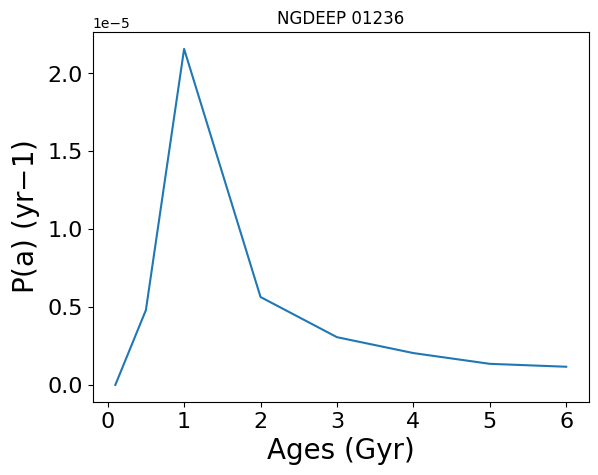

In [10]:
plt.plot(ages, np.exp(-chi/2))
plt.xlabel('Ages (Gyr)', fontsize = 20)
plt.ylabel('P(a) (yr$-1$)', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("NGDEEP 01236")

plt.savefig('fitting_graphs/0.5_1.0/NGDEEP_01236_Age',bbox_inches='tight', dpi=150)

In [11]:
#load the beam NGDEEP_01204
mb_01204 = multifit.MultiBeam('0.5_1.0_updated/ngdeep_01204.beams.fits')

load_master_fits: 0.5_1.0_updated/ngdeep_01204.beams.fits
 !! Shift GR150C.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
1 jw02079004002_11101_00001_nis_rate.fits GR150C
2 jw02079001001_11101_00001_nis_rate.fits GR150C
3 jw02079001001_03101_00002_nis_rate.fits GR150R
4 jw02079004002_03101_00002_nis_rate.fits GR150R
5 jw02079001002_05101_00002_nis_rate.fits GR150C
6 jw02079004001_05101_00002_nis_rate.fits GR150C
 !! Shift GR150R.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
7 jw02079001002_09101_00001_nis_rate.fits GR150R
8 jw02079004001_09101_00001_nis_rate.fits GR150R
9 jw02079004002_05101_00003_nis_rate.fits GR150C
 !! Shift GR150R.F200W.220725.conf along dispersion
10 jw02079001003_03101_00001_nis_rate.fits GR150R
11 jw02079001001_05101_00003_nis_rate.fits GR150C
12 jw02079004001_03101_00003_nis_rate.fits GR150R
 !! Shift GR150C.F200W.220725.conf along dispersion
13 jw02079004003_05101_00001_nis_rate.fits GR150C
1

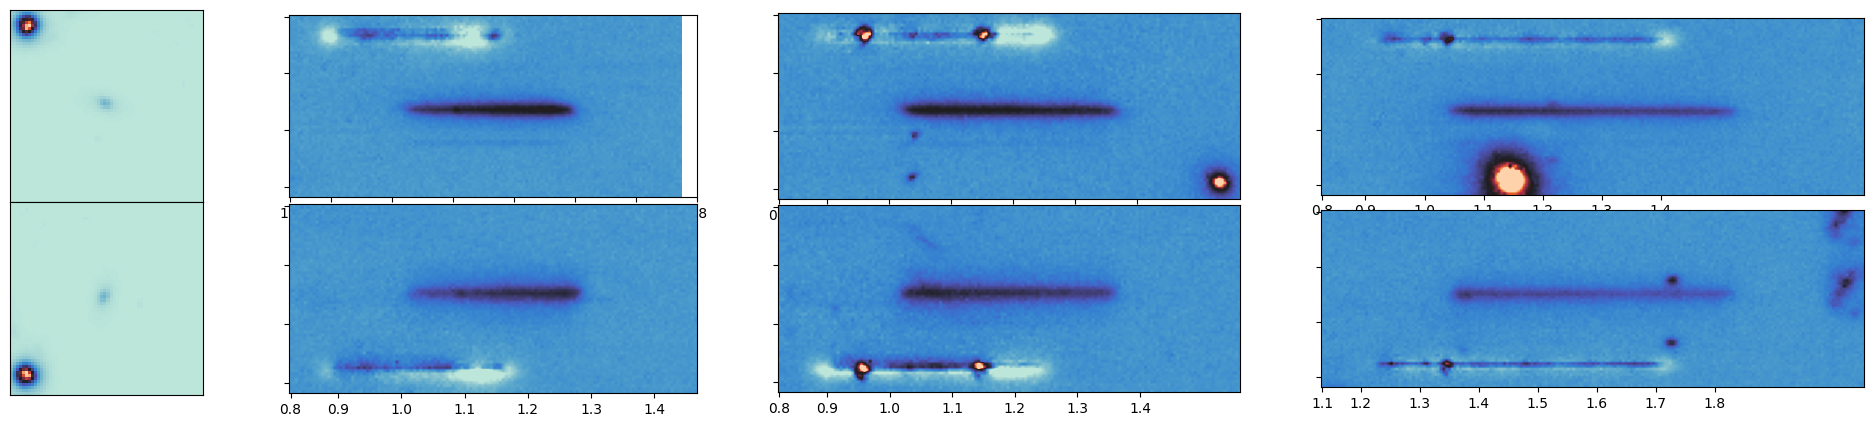

In [12]:
#2d grism of NGDEEP 01298
Idict = {}

for b in mb_01204.beams:
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        Idict[f'R-{b.grism.filter}'] = np.zeros(b.beam.sh)
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        Idict[f'C-{b.grism.filter}'] = np.zeros(b.beam.sh)
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
for b in mb_01204.beams:
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
        Idict[f'R-{b.grism.filter}'] += b.beam.direct
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
        Idict[f'C-{b.grism.filter}'] += b.beam.direct
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))

        
stk_115C = sum(np.array(Idict['F115W-GR150C']) * np.array(Idict['F115W-GR150C_err']) )/sum(np.array(Idict['F115W-GR150C_err'])) 
stk_115R = sum(np.array(Idict['F115W-GR150R']) * np.array(Idict['F115W-GR150R_err']) )/sum(np.array(Idict['F115W-GR150R_err'])) 
stk_150C = sum(np.array(Idict['F150W-GR150C']) * np.array(Idict['F150W-GR150C_err']) )/sum(np.array(Idict['F150W-GR150C_err'])) 
stk_150R = sum(np.array(Idict['F150W-GR150R']) * np.array(Idict['F150W-GR150R_err']) )/sum(np.array(Idict['F150W-GR150R_err'])) 
stk_200C = sum(np.array(Idict['F200W-GR150C']) * np.array(Idict['F200W-GR150C_err']) )/sum(np.array(Idict['F200W-GR150C_err'])) 
stk_200R = sum(np.array(Idict['F200W-GR150R']) * np.array(Idict['F200W-GR150R_err']) )/sum(np.array(Idict['F200W-GR150R_err'])) 

from matplotlib.gridspec import GridSpec
import seaborn as sea
gs = GridSpec(2,4, width_ratios = [0.75,1.5,1.7,2], hspace = 0)
plt.figure(figsize= [24,5])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[3])
ax2 = plt.subplot(gs[2])
ax10 = plt.subplot(gs[4])
ax11 = plt.subplot(gs[5])
ax12 = plt.subplot(gs[6])
ax13 = plt.subplot(gs[7])


ax0.imshow(Idict['C-GR150C'], vmin = -1E-23, vmax = np.max(Idict['C-GR150C']), cmap = 'icefire')
ax0.set_xticks([])
ax0.set_yticks([])

ax1.imshow(stk_115C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_01204.beams[0].beam.twod_axis_labels(mpl_axis=ax1)
ax1.set_yticklabels([])

ax2.imshow(stk_150C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_01204.beams[2].beam.twod_axis_labels(mpl_axis=ax2)
ax2.set_yticklabels([])

ax3.imshow(stk_200C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_01204.beams[4].beam.twod_axis_labels(mpl_axis=ax3)
ax3.set_yticklabels([])  

ax10.imshow(Idict['R-GR150R'], vmin = -1E-23, vmax = np.max(Idict['R-GR150R']), cmap = 'icefire')
ax10.set_xticks([])
ax10.set_yticks([])


ax11.imshow(stk_115R, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_01204.beams[1].beam.twod_axis_labels(mpl_axis=ax11)
ax11.set_yticklabels([])

ax12.imshow(stk_150R, cmap = 'icefire', vmin = -0.1, vmax = 0.5  )
mb_01204.beams[10].beam.twod_axis_labels(mpl_axis=ax12)
ax12.set_yticklabels([])

ax13.imshow(stk_200R, cmap = 'icefire', vmin = -0.1, vmax = 0.5 )
mb_01204.beams[6].beam.twod_axis_labels(mpl_axis=ax13)
ax13.set_yticklabels([])  

plt.savefig('fitting_graphs/0.5_1.0/NGDEEP_01204_GRISM')

In [13]:
ages = [0.1,0.5,1,2,3,4,5,6]

chi = np.zeros_like(ages)
for i,a in enumerate(ages):
    lam, spec = sp.get_spectrum(tage = a, peraa=True)
    flam = F_lam_per_M(spec, lam, specz, 0, sp.stellar_mass)
    tdict = {'a' : SpectrumTemplate(lam,flam)}
    
    tfit = mb_01204.template_at_z(z=specz, templates=tdict)
    chi[i] = tfit['chi2']/mb_01204.DoF

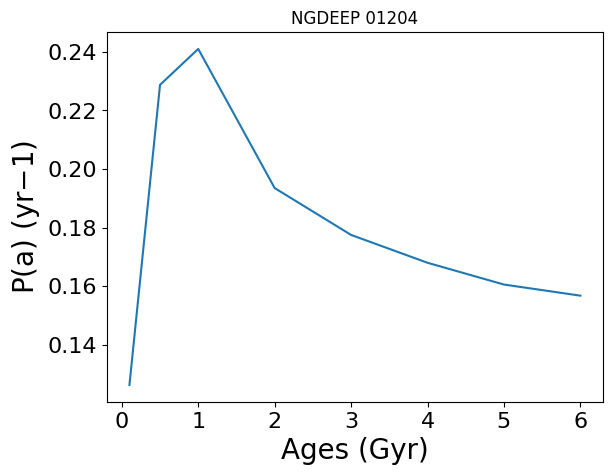

In [14]:
plt.plot(ages, np.exp(-chi/2))
plt.xlabel('Ages (Gyr)', fontsize = 20)
plt.ylabel('P(a) (yr$-1$)', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("NGDEEP 01204")

plt.savefig('fitting_graphs/0.5_1.0/NGDEEP_01204_Age',bbox_inches='tight', dpi=150)

In [15]:
#load the beam NGDEEP_00570
mb_00570 = multifit.MultiBeam('0.5_1.0_updated/ngdeep_00570.beams.fits')

load_master_fits: 0.5_1.0_updated/ngdeep_00570.beams.fits
 !! Shift GR150C.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
1 jw02079004002_11101_00001_nis_rate.fits GR150C
2 jw02079001001_11101_00001_nis_rate.fits GR150C
3 jw02079001001_03101_00002_nis_rate.fits GR150R
4 jw02079004002_03101_00002_nis_rate.fits GR150R
5 jw02079001002_05101_00002_nis_rate.fits GR150C
6 jw02079004001_05101_00002_nis_rate.fits GR150C
 !! Shift GR150R.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
7 jw02079001002_09101_00001_nis_rate.fits GR150R
8 jw02079004001_09101_00001_nis_rate.fits GR150R
9 jw02079004002_05101_00003_nis_rate.fits GR150C
 !! Shift GR150R.F200W.220725.conf along dispersion
10 jw02079001003_03101_00001_nis_rate.fits GR150R
11 jw02079001001_05101_00003_nis_rate.fits GR150C
12 jw02079004001_03101_00003_nis_rate.fits GR150R
 !! Shift GR150C.F200W.220725.conf along dispersion
13 jw02079004003_05101_00001_nis_rate.fits GR150C
1

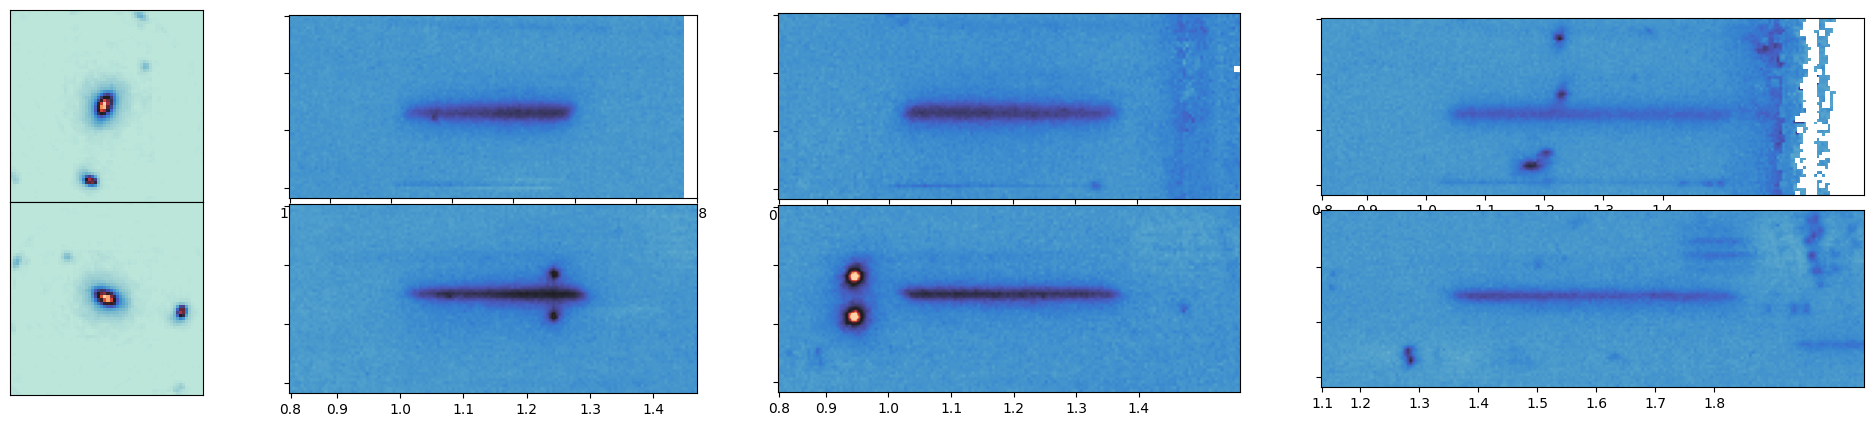

In [16]:
#2d grism of NGDEEP 01298
Idict = {}

for b in mb_00570.beams:
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        Idict[f'R-{b.grism.filter}'] = np.zeros(b.beam.sh)
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        Idict[f'C-{b.grism.filter}'] = np.zeros(b.beam.sh)
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
for b in mb_00570.beams:
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
        Idict[f'R-{b.grism.filter}'] += b.beam.direct
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
        Idict[f'C-{b.grism.filter}'] += b.beam.direct
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))

        
stk_115C = sum(np.array(Idict['F115W-GR150C']) * np.array(Idict['F115W-GR150C_err']) )/sum(np.array(Idict['F115W-GR150C_err'])) 
stk_115R = sum(np.array(Idict['F115W-GR150R']) * np.array(Idict['F115W-GR150R_err']) )/sum(np.array(Idict['F115W-GR150R_err'])) 
stk_150C = sum(np.array(Idict['F150W-GR150C']) * np.array(Idict['F150W-GR150C_err']) )/sum(np.array(Idict['F150W-GR150C_err'])) 
stk_150R = sum(np.array(Idict['F150W-GR150R']) * np.array(Idict['F150W-GR150R_err']) )/sum(np.array(Idict['F150W-GR150R_err'])) 
stk_200C = sum(np.array(Idict['F200W-GR150C']) * np.array(Idict['F200W-GR150C_err']) )/sum(np.array(Idict['F200W-GR150C_err'])) 
stk_200R = sum(np.array(Idict['F200W-GR150R']) * np.array(Idict['F200W-GR150R_err']) )/sum(np.array(Idict['F200W-GR150R_err'])) 

from matplotlib.gridspec import GridSpec
import seaborn as sea
gs = GridSpec(2,4, width_ratios = [0.75,1.5,1.7,2], hspace = 0)
plt.figure(figsize= [24,5])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[3])
ax2 = plt.subplot(gs[2])
ax10 = plt.subplot(gs[4])
ax11 = plt.subplot(gs[5])
ax12 = plt.subplot(gs[6])
ax13 = plt.subplot(gs[7])


ax0.imshow(Idict['C-GR150C'], vmin = -1E-23, vmax = np.max(Idict['C-GR150C']), cmap = 'icefire')
ax0.set_xticks([])
ax0.set_yticks([])

ax1.imshow(stk_115C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_00570.beams[0].beam.twod_axis_labels(mpl_axis=ax1)
ax1.set_yticklabels([])

ax2.imshow(stk_150C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_00570.beams[2].beam.twod_axis_labels(mpl_axis=ax2)
ax2.set_yticklabels([])

ax3.imshow(stk_200C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_00570.beams[4].beam.twod_axis_labels(mpl_axis=ax3)
ax3.set_yticklabels([])  

ax10.imshow(Idict['R-GR150R'], vmin = -1E-23, vmax = np.max(Idict['R-GR150R']), cmap = 'icefire')
ax10.set_xticks([])
ax10.set_yticks([])


ax11.imshow(stk_115R, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_00570.beams[1].beam.twod_axis_labels(mpl_axis=ax11)
ax11.set_yticklabels([])

ax12.imshow(stk_150R, cmap = 'icefire', vmin = -0.1, vmax = 0.5  )
mb_00570.beams[10].beam.twod_axis_labels(mpl_axis=ax12)
ax12.set_yticklabels([])

ax13.imshow(stk_200R, cmap = 'icefire', vmin = -0.1, vmax = 0.5 )
mb_00570.beams[6].beam.twod_axis_labels(mpl_axis=ax13)
ax13.set_yticklabels([])  

plt.savefig('fitting_graphs/0.5_1.0/NGDEEP_00570_GRISM')

In [17]:
ages = [0.1,0.5,1,2,3,4,5,6]

chi = np.zeros_like(ages)
for i,a in enumerate(ages):
    lam, spec = sp.get_spectrum(tage = a, peraa=True)
    flam = F_lam_per_M(spec, lam, specz, 0, sp.stellar_mass)
    tdict = {'a' : SpectrumTemplate(lam,flam)}
    
    tfit = mb_00570.template_at_z(z=specz, templates=tdict)
    chi[i] = tfit['chi2']/mb_00570.DoF

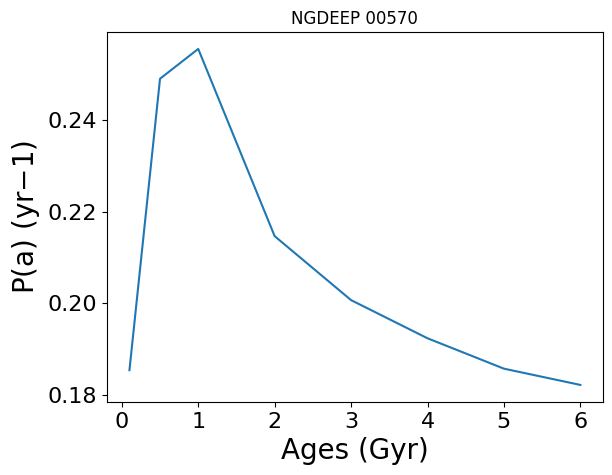

In [18]:
plt.plot(ages, np.exp(-chi/2))
plt.xlabel('Ages (Gyr)', fontsize = 20)
plt.ylabel('P(a) (yr$-1$)', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("NGDEEP 00570")

plt.savefig('fitting_graphs/0.5_1.0/NGDEEP_00570_Age',bbox_inches='tight', dpi=150)

In [19]:
#load the beam NGDEEP_00526
mb_00526 = multifit.MultiBeam('0.5_1.0_updated/ngdeep_00526.beams.fits')

load_master_fits: 0.5_1.0_updated/ngdeep_00526.beams.fits
 !! Shift GR150C.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
1 jw02079004002_11101_00001_nis_rate.fits GR150C
2 jw02079001001_11101_00001_nis_rate.fits GR150C
3 jw02079001001_03101_00002_nis_rate.fits GR150R
4 jw02079004002_03101_00002_nis_rate.fits GR150R
5 jw02079001002_05101_00002_nis_rate.fits GR150C
6 jw02079004001_05101_00002_nis_rate.fits GR150C
 !! Shift GR150R.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
7 jw02079001002_09101_00001_nis_rate.fits GR150R
8 jw02079004001_09101_00001_nis_rate.fits GR150R
9 jw02079004002_05101_00003_nis_rate.fits GR150C
 !! Shift GR150R.F200W.220725.conf along dispersion
10 jw02079001003_03101_00001_nis_rate.fits GR150R
11 jw02079001001_05101_00003_nis_rate.fits GR150C
12 jw02079004001_03101_00003_nis_rate.fits GR150R
 !! Shift GR150C.F200W.220725.conf along dispersion
13 jw02079004003_05101_00001_nis_rate.fits GR150C
1

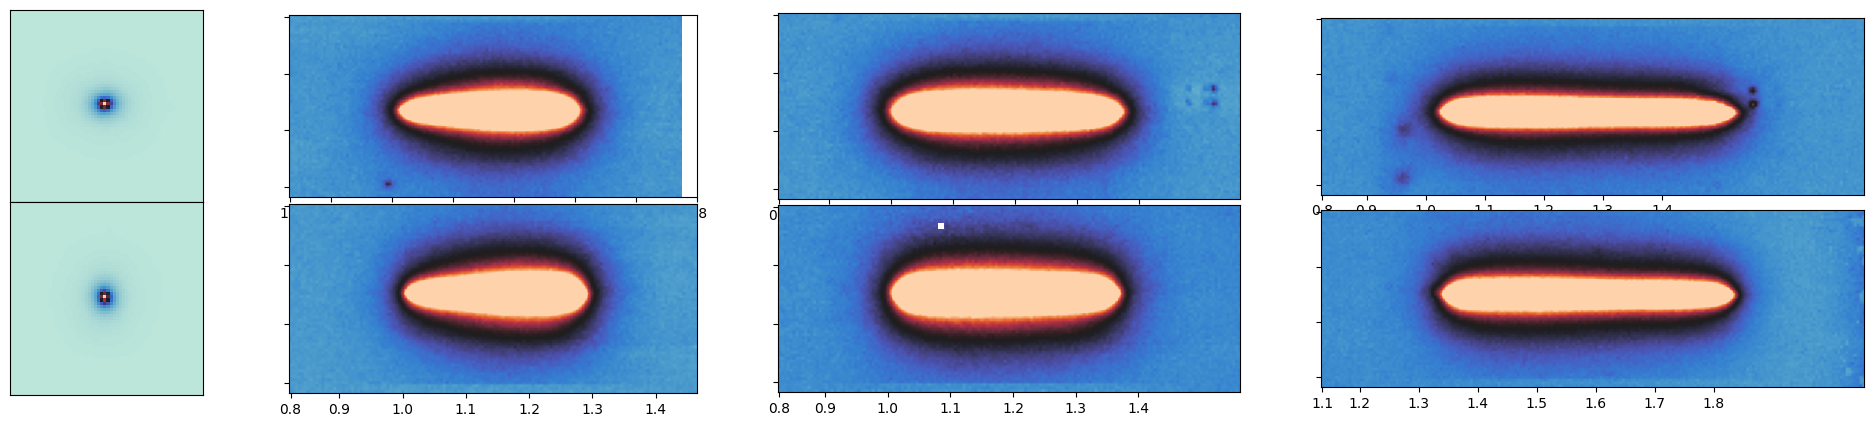

In [20]:
#2d grism of NGDEEP 01298
Idict = {}

for b in mb_00526.beams:
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        Idict[f'R-{b.grism.filter}'] = np.zeros(b.beam.sh)
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        Idict[f'C-{b.grism.filter}'] = np.zeros(b.beam.sh)
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
for b in mb_00526.beams:
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
        Idict[f'R-{b.grism.filter}'] += b.beam.direct
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
        Idict[f'C-{b.grism.filter}'] += b.beam.direct
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))

        
stk_115C = sum(np.array(Idict['F115W-GR150C']) * np.array(Idict['F115W-GR150C_err']) )/sum(np.array(Idict['F115W-GR150C_err'])) 
stk_115R = sum(np.array(Idict['F115W-GR150R']) * np.array(Idict['F115W-GR150R_err']) )/sum(np.array(Idict['F115W-GR150R_err'])) 
stk_150C = sum(np.array(Idict['F150W-GR150C']) * np.array(Idict['F150W-GR150C_err']) )/sum(np.array(Idict['F150W-GR150C_err'])) 
stk_150R = sum(np.array(Idict['F150W-GR150R']) * np.array(Idict['F150W-GR150R_err']) )/sum(np.array(Idict['F150W-GR150R_err'])) 
stk_200C = sum(np.array(Idict['F200W-GR150C']) * np.array(Idict['F200W-GR150C_err']) )/sum(np.array(Idict['F200W-GR150C_err'])) 
stk_200R = sum(np.array(Idict['F200W-GR150R']) * np.array(Idict['F200W-GR150R_err']) )/sum(np.array(Idict['F200W-GR150R_err'])) 

from matplotlib.gridspec import GridSpec
import seaborn as sea
gs = GridSpec(2,4, width_ratios = [0.75,1.5,1.7,2], hspace = 0)
plt.figure(figsize= [24,5])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[3])
ax2 = plt.subplot(gs[2])
ax10 = plt.subplot(gs[4])
ax11 = plt.subplot(gs[5])
ax12 = plt.subplot(gs[6])
ax13 = plt.subplot(gs[7])


ax0.imshow(Idict['C-GR150C'], vmin = -1E-23, vmax = np.max(Idict['C-GR150C']), cmap = 'icefire')
ax0.set_xticks([])
ax0.set_yticks([])

ax1.imshow(stk_115C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_00526.beams[0].beam.twod_axis_labels(mpl_axis=ax1)
ax1.set_yticklabels([])

ax2.imshow(stk_150C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_00526.beams[2].beam.twod_axis_labels(mpl_axis=ax2)
ax2.set_yticklabels([])

ax3.imshow(stk_200C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_00526.beams[4].beam.twod_axis_labels(mpl_axis=ax3)
ax3.set_yticklabels([])  

ax10.imshow(Idict['R-GR150R'], vmin = -1E-23, vmax = np.max(Idict['R-GR150R']), cmap = 'icefire')
ax10.set_xticks([])
ax10.set_yticks([])


ax11.imshow(stk_115R, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_00526.beams[1].beam.twod_axis_labels(mpl_axis=ax11)
ax11.set_yticklabels([])

ax12.imshow(stk_150R, cmap = 'icefire', vmin = -0.1, vmax = 0.5  )
mb_00526.beams[10].beam.twod_axis_labels(mpl_axis=ax12)
ax12.set_yticklabels([])

ax13.imshow(stk_200R, cmap = 'icefire', vmin = -0.1, vmax = 0.5 )
mb_00526.beams[6].beam.twod_axis_labels(mpl_axis=ax13)
ax13.set_yticklabels([])  

plt.savefig('fitting_graphs/0.5_1.0/NGDEEP_00526_GRISM')

In [21]:
ages = [0.1,0.5,1,2,3,4,5,6]

chi = np.zeros_like(ages)
for i,a in enumerate(ages):
    lam, spec = sp.get_spectrum(tage = a, peraa=True)
    flam = F_lam_per_M(spec, lam, specz, 0, sp.stellar_mass)
    tdict = {'a' : SpectrumTemplate(lam,flam)}
    
    tfit = mb_00526.template_at_z(z=specz, templates=tdict)
    chi[i] = tfit['chi2']/mb_00526.DoF

Except: covar!
Except: covar!
Except: covar!
Except: covar!
Except: covar!
Except: covar!
Except: covar!
Except: covar!


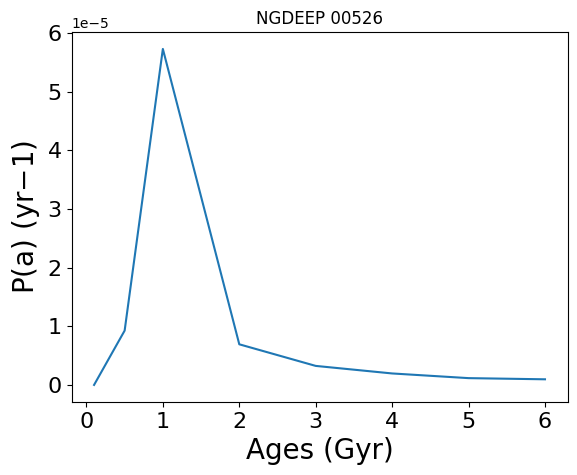

In [22]:
plt.plot(ages, np.exp(-chi/2))
plt.xlabel('Ages (Gyr)', fontsize = 20)
plt.ylabel('P(a) (yr$-1$)', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("NGDEEP 00526")

plt.savefig('fitting_graphs/0.5_1.0/NGDEEP_00526_Age',bbox_inches='tight', dpi=150)

In [23]:
#load the beam NGDEEP_00480
mb_00480 = multifit.MultiBeam('0.5_1.0_updated/ngdeep_00480.beams.fits')

load_master_fits: 0.5_1.0_updated/ngdeep_00480.beams.fits
 !! Shift GR150C.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
1 jw02079004002_11101_00001_nis_rate.fits GR150C
2 jw02079001001_11101_00001_nis_rate.fits GR150C
3 jw02079001001_03101_00002_nis_rate.fits GR150R
4 jw02079004002_03101_00002_nis_rate.fits GR150R
5 jw02079001002_05101_00002_nis_rate.fits GR150C
6 jw02079004001_05101_00002_nis_rate.fits GR150C
 !! Shift GR150R.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
7 jw02079001002_09101_00001_nis_rate.fits GR150R
8 jw02079004001_09101_00001_nis_rate.fits GR150R
9 jw02079004002_05101_00003_nis_rate.fits GR150C
 !! Shift GR150R.F200W.220725.conf along dispersion
10 jw02079001003_03101_00001_nis_rate.fits GR150R
11 jw02079001001_05101_00003_nis_rate.fits GR150C
12 jw02079004001_03101_00003_nis_rate.fits GR150R
 !! Shift GR150C.F200W.220725.conf along dispersion
13 jw02079004003_05101_00001_nis_rate.fits GR150C
1

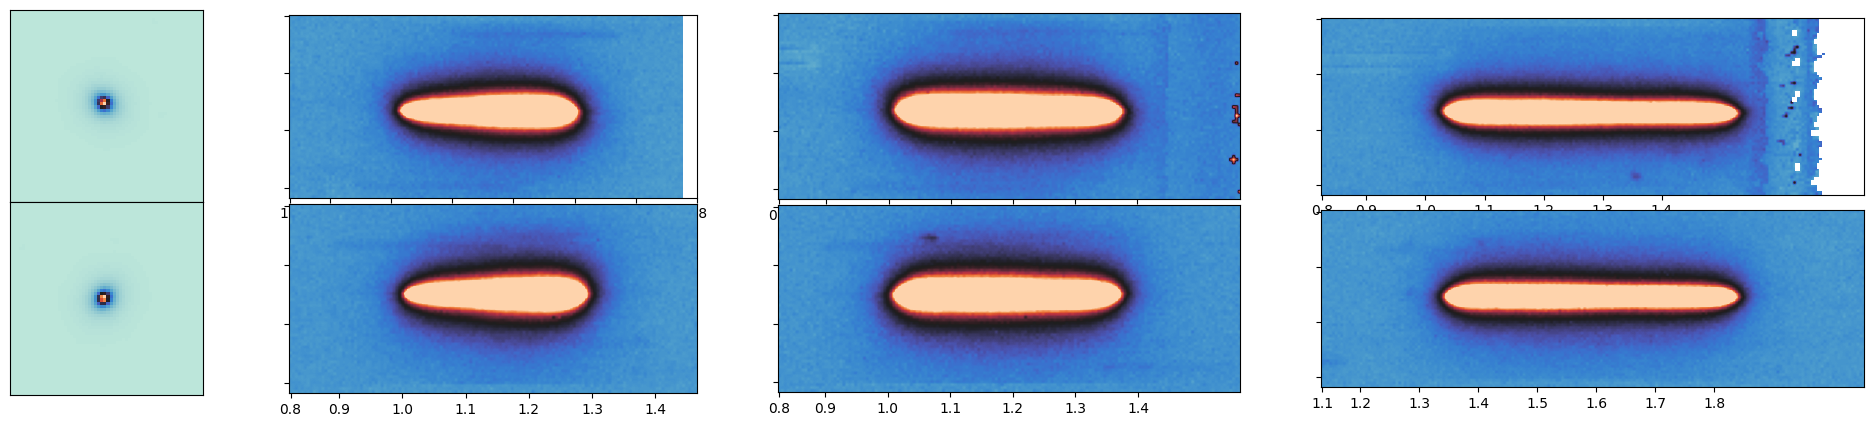

In [24]:
#2d grism of NGDEEP 01298
Idict = {}

for b in mb_00480.beams:
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        Idict[f'R-{b.grism.filter}'] = np.zeros(b.beam.sh)
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        Idict[f'C-{b.grism.filter}'] = np.zeros(b.beam.sh)
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
for b in mb_00480.beams:
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
        Idict[f'R-{b.grism.filter}'] += b.beam.direct
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
        Idict[f'C-{b.grism.filter}'] += b.beam.direct
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))

        
stk_115C = sum(np.array(Idict['F115W-GR150C']) * np.array(Idict['F115W-GR150C_err']) )/sum(np.array(Idict['F115W-GR150C_err'])) 
stk_115R = sum(np.array(Idict['F115W-GR150R']) * np.array(Idict['F115W-GR150R_err']) )/sum(np.array(Idict['F115W-GR150R_err'])) 
stk_150C = sum(np.array(Idict['F150W-GR150C']) * np.array(Idict['F150W-GR150C_err']) )/sum(np.array(Idict['F150W-GR150C_err'])) 
stk_150R = sum(np.array(Idict['F150W-GR150R']) * np.array(Idict['F150W-GR150R_err']) )/sum(np.array(Idict['F150W-GR150R_err'])) 
stk_200C = sum(np.array(Idict['F200W-GR150C']) * np.array(Idict['F200W-GR150C_err']) )/sum(np.array(Idict['F200W-GR150C_err'])) 
stk_200R = sum(np.array(Idict['F200W-GR150R']) * np.array(Idict['F200W-GR150R_err']) )/sum(np.array(Idict['F200W-GR150R_err'])) 

from matplotlib.gridspec import GridSpec
import seaborn as sea
gs = GridSpec(2,4, width_ratios = [0.75,1.5,1.7,2], hspace = 0)
plt.figure(figsize= [24,5])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[3])
ax2 = plt.subplot(gs[2])
ax10 = plt.subplot(gs[4])
ax11 = plt.subplot(gs[5])
ax12 = plt.subplot(gs[6])
ax13 = plt.subplot(gs[7])


ax0.imshow(Idict['C-GR150C'], vmin = -1E-23, vmax = np.max(Idict['C-GR150C']), cmap = 'icefire')
ax0.set_xticks([])
ax0.set_yticks([])

ax1.imshow(stk_115C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_00480.beams[0].beam.twod_axis_labels(mpl_axis=ax1)
ax1.set_yticklabels([])

ax2.imshow(stk_150C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_00480.beams[2].beam.twod_axis_labels(mpl_axis=ax2)
ax2.set_yticklabels([])

ax3.imshow(stk_200C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_00480.beams[4].beam.twod_axis_labels(mpl_axis=ax3)
ax3.set_yticklabels([])  

ax10.imshow(Idict['R-GR150R'], vmin = -1E-23, vmax = np.max(Idict['R-GR150R']), cmap = 'icefire')
ax10.set_xticks([])
ax10.set_yticks([])


ax11.imshow(stk_115R, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_00480.beams[1].beam.twod_axis_labels(mpl_axis=ax11)
ax11.set_yticklabels([])

ax12.imshow(stk_150R, cmap = 'icefire', vmin = -0.1, vmax = 0.5  )
mb_00480.beams[10].beam.twod_axis_labels(mpl_axis=ax12)
ax12.set_yticklabels([])

ax13.imshow(stk_200R, cmap = 'icefire', vmin = -0.1, vmax = 0.5 )
mb_00480.beams[6].beam.twod_axis_labels(mpl_axis=ax13)
ax13.set_yticklabels([])  

plt.savefig('fitting_graphs/0.5_1.0/NGDEEP_00480_GRISM')

In [25]:
ages = [0.1,0.5,1,2,3,4,5,6]

chi = np.zeros_like(ages)
for i,a in enumerate(ages):
    lam, spec = sp.get_spectrum(tage = a, peraa=True)
    flam = F_lam_per_M(spec, lam, specz, 0, sp.stellar_mass)
    tdict = {'a' : SpectrumTemplate(lam,flam)}
    
    tfit = mb_00480.template_at_z(z=specz, templates=tdict)
    chi[i] = tfit['chi2']/mb_00480.DoF

Except: covar!
Except: covar!
Except: covar!
Except: covar!
Except: covar!
Except: covar!
Except: covar!
Except: covar!


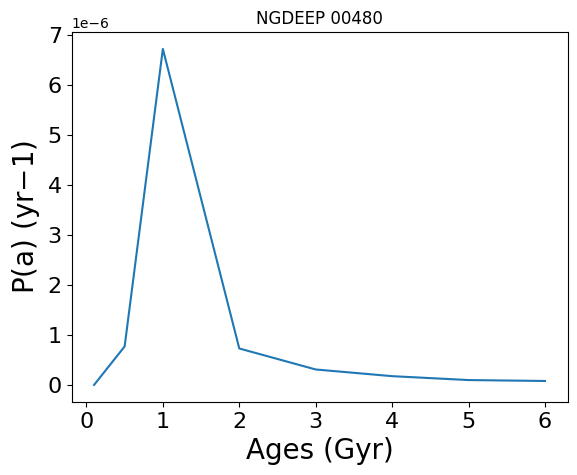

In [26]:
plt.plot(ages, np.exp(-chi/2))
plt.xlabel('Ages (Gyr)', fontsize = 20)
plt.ylabel('P(a) (yr$-1$)', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("NGDEEP 00480")

plt.savefig('fitting_graphs/0.5_1.0/NGDEEP_00480_Age',bbox_inches='tight', dpi=150)

In [27]:
#load the beam NGDEEP_00398
mb_00398 = multifit.MultiBeam('0.5_1.0_updated/ngdeep_00398.beams.fits')

load_master_fits: 0.5_1.0_updated/ngdeep_00398.beams.fits
1 jw02079001001_11101_00001_nis_rate.fits GR150C
2 jw02079001001_03101_00002_nis_rate.fits GR150R
3 jw02079004002_03101_00002_nis_rate.fits GR150R
4 jw02079001002_05101_00002_nis_rate.fits GR150C
5 jw02079004001_05101_00002_nis_rate.fits GR150C
 !! Shift GR150R.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
6 jw02079001002_09101_00001_nis_rate.fits GR150R
7 jw02079004001_09101_00001_nis_rate.fits GR150R
8 jw02079004002_05101_00003_nis_rate.fits GR150C
 !! Shift GR150R.F200W.220725.conf along dispersion
9 jw02079001003_03101_00001_nis_rate.fits GR150R
10 jw02079001001_05101_00003_nis_rate.fits GR150C
11 jw02079004001_03101_00003_nis_rate.fits GR150R
 !! Shift GR150C.F200W.220725.conf along dispersion
12 jw02079004003_05101_00001_nis_rate.fits GR150C
13 jw02079001002_03101_00003_nis_rate.fits GR150R
14 jw02079004001_05101_00003_nis_rate.fits GR150C
 !! Shift GR150R.F200W.220725.conf along dispersi

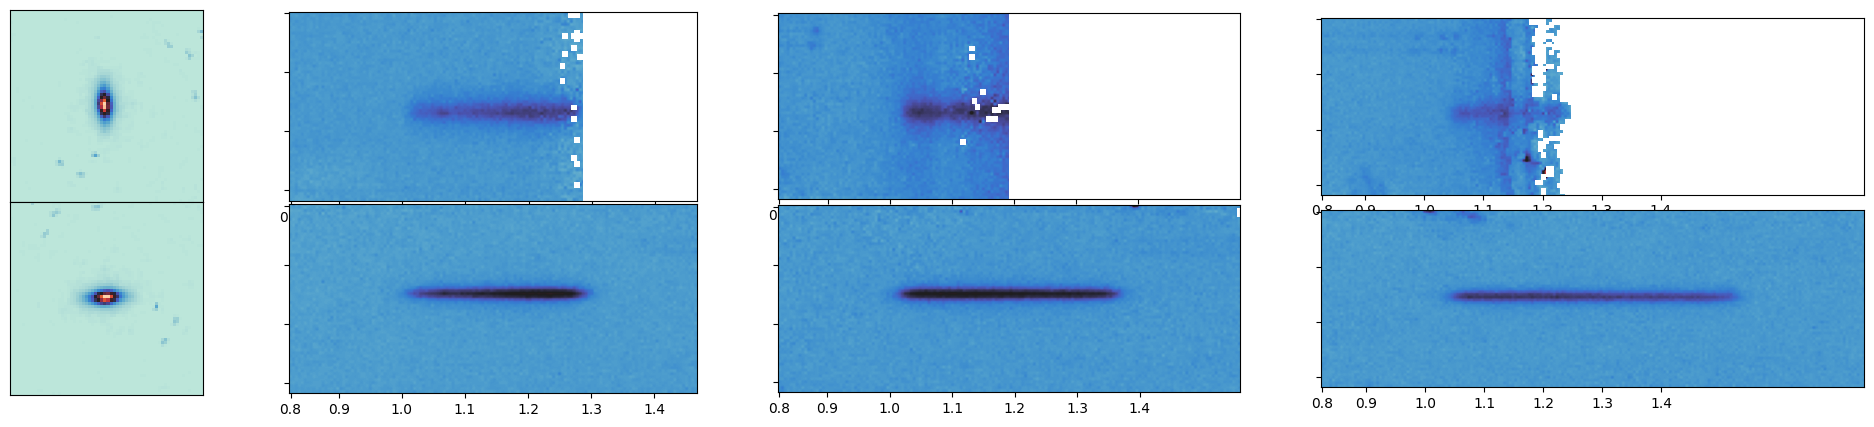

In [28]:
#2d grism of NGDEEP 01298
Idict = {}

for b in mb_00398.beams:
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        Idict[f'R-{b.grism.filter}'] = np.zeros(b.beam.sh)
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        Idict[f'C-{b.grism.filter}'] = np.zeros(b.beam.sh)
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
for b in mb_00398.beams:
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
        Idict[f'R-{b.grism.filter}'] += b.beam.direct
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
        Idict[f'C-{b.grism.filter}'] += b.beam.direct
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))

        
stk_115C = sum(np.array(Idict['F115W-GR150C']) * np.array(Idict['F115W-GR150C_err']) )/sum(np.array(Idict['F115W-GR150C_err'])) 
stk_115R = sum(np.array(Idict['F115W-GR150R']) * np.array(Idict['F115W-GR150R_err']) )/sum(np.array(Idict['F115W-GR150R_err'])) 
stk_150C = sum(np.array(Idict['F150W-GR150C']) * np.array(Idict['F150W-GR150C_err']) )/sum(np.array(Idict['F150W-GR150C_err'])) 
stk_150R = sum(np.array(Idict['F150W-GR150R']) * np.array(Idict['F150W-GR150R_err']) )/sum(np.array(Idict['F150W-GR150R_err'])) 
stk_200C = sum(np.array(Idict['F200W-GR150C']) * np.array(Idict['F200W-GR150C_err']) )/sum(np.array(Idict['F200W-GR150C_err'])) 
stk_200R = sum(np.array(Idict['F200W-GR150R']) * np.array(Idict['F200W-GR150R_err']) )/sum(np.array(Idict['F200W-GR150R_err'])) 

from matplotlib.gridspec import GridSpec
import seaborn as sea
gs = GridSpec(2,4, width_ratios = [0.75,1.5,1.7,2], hspace = 0)
plt.figure(figsize= [24,5])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[3])
ax2 = plt.subplot(gs[2])
ax10 = plt.subplot(gs[4])
ax11 = plt.subplot(gs[5])
ax12 = plt.subplot(gs[6])
ax13 = plt.subplot(gs[7])


ax0.imshow(Idict['C-GR150C'], vmin = -1E-23, vmax = np.max(Idict['C-GR150C']), cmap = 'icefire')
ax0.set_xticks([])
ax0.set_yticks([])

ax1.imshow(stk_115C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_00398.beams[0].beam.twod_axis_labels(mpl_axis=ax1)
ax1.set_yticklabels([])

ax2.imshow(stk_150C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_00398.beams[2].beam.twod_axis_labels(mpl_axis=ax2)
ax2.set_yticklabels([])

ax3.imshow(stk_200C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_00398.beams[4].beam.twod_axis_labels(mpl_axis=ax3)
ax3.set_yticklabels([])  

ax10.imshow(Idict['R-GR150R'], vmin = -1E-23, vmax = np.max(Idict['R-GR150R']), cmap = 'icefire')
ax10.set_xticks([])
ax10.set_yticks([])


ax11.imshow(stk_115R, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_00398.beams[1].beam.twod_axis_labels(mpl_axis=ax11)
ax11.set_yticklabels([])

ax12.imshow(stk_150R, cmap = 'icefire', vmin = -0.1, vmax = 0.5  )
mb_00398.beams[10].beam.twod_axis_labels(mpl_axis=ax12)
ax12.set_yticklabels([])

ax13.imshow(stk_200R, cmap = 'icefire', vmin = -0.1, vmax = 0.5 )
mb_00398.beams[6].beam.twod_axis_labels(mpl_axis=ax13)
ax13.set_yticklabels([])  

plt.savefig('fitting_graphs/0.5_1.0/NGDEEP_00398_GRISM')

In [29]:
ages = [0.1,0.5,1,2,3,4,5,6]

chi = np.zeros_like(ages)
for i,a in enumerate(ages):
    lam, spec = sp.get_spectrum(tage = a, peraa=True)
    flam = F_lam_per_M(spec, lam, specz, 0, sp.stellar_mass)
    tdict = {'a' : SpectrumTemplate(lam,flam)}
    
    tfit = mb_00398.template_at_z(z=specz, templates=tdict)
    chi[i] = tfit['chi2']/mb_00398.DoF

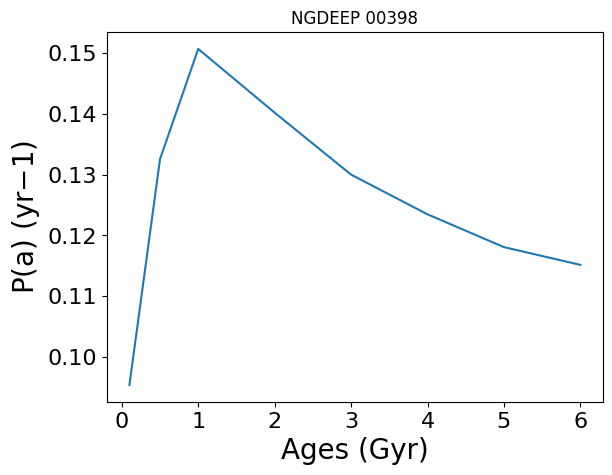

In [30]:
plt.plot(ages, np.exp(-chi/2))
plt.xlabel('Ages (Gyr)', fontsize = 20)
plt.ylabel('P(a) (yr$-1$)', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("NGDEEP 00398")

plt.savefig('fitting_graphs/0.5_1.0/NGDEEP_00398_Age',bbox_inches='tight', dpi=150)

In [31]:
#load the beam NGDEEP_03673
mb_03673 = multifit.MultiBeam('0.5_1.0_updated/ngdeep_03673.beams.fits')

load_master_fits: 0.5_1.0_updated/ngdeep_03673.beams.fits
 !! Shift GR150C.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
1 jw02079004002_11101_00001_nis_rate.fits GR150C
2 jw02079001001_11101_00001_nis_rate.fits GR150C
3 jw02079001001_03101_00002_nis_rate.fits GR150R
4 jw02079004002_03101_00002_nis_rate.fits GR150R
5 jw02079001002_05101_00002_nis_rate.fits GR150C
6 jw02079004001_05101_00002_nis_rate.fits GR150C
 !! Shift GR150R.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
7 jw02079001002_09101_00001_nis_rate.fits GR150R
8 jw02079004001_09101_00001_nis_rate.fits GR150R
9 jw02079004002_05101_00003_nis_rate.fits GR150C
 !! Shift GR150R.F200W.220725.conf along dispersion
10 jw02079001003_03101_00001_nis_rate.fits GR150R
11 jw02079001001_05101_00003_nis_rate.fits GR150C
12 jw02079004001_03101_00003_nis_rate.fits GR150R
 !! Shift GR150C.F200W.220725.conf along dispersion
13 jw02079004003_05101_00001_nis_rate.fits GR150C
1

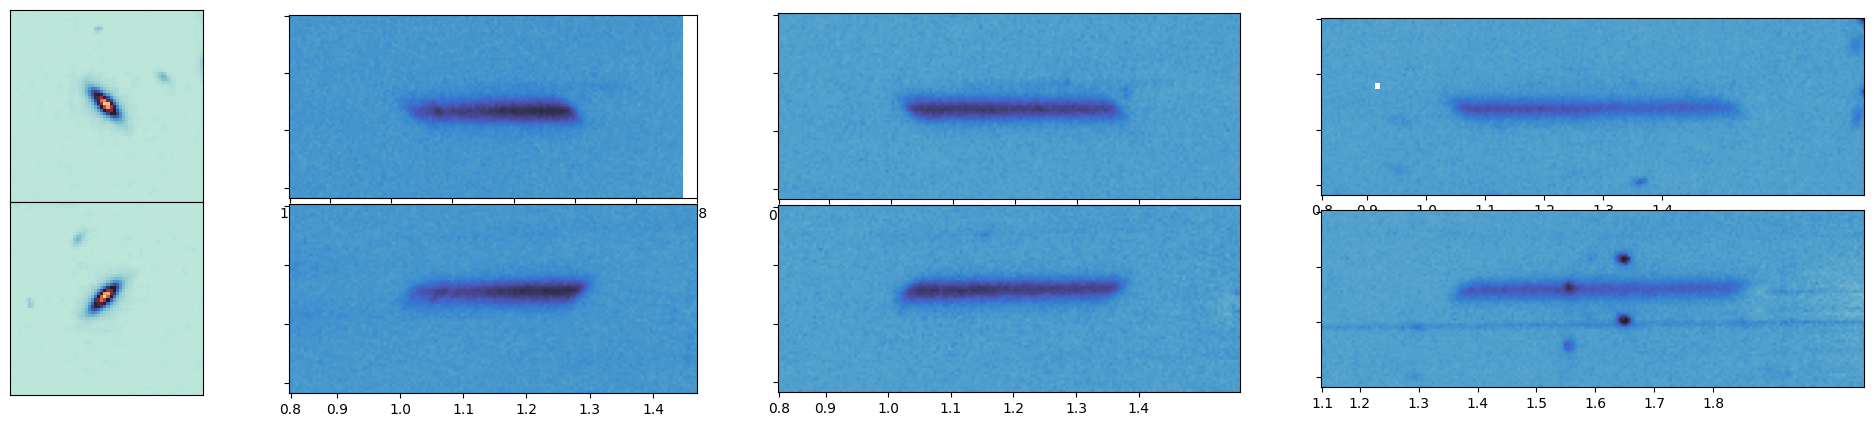

In [32]:
#2d grism of NGDEEP 01298
Idict = {}

for b in mb_03673.beams:
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        Idict[f'R-{b.grism.filter}'] = np.zeros(b.beam.sh)
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        Idict[f'C-{b.grism.filter}'] = np.zeros(b.beam.sh)
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'] = []
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'] = []
        
for b in mb_03673.beams:
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150R':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F115W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
        Idict[f'R-{b.grism.filter}'] += b.beam.direct
    if b.grism.pupil == 'F150W' and b.grism.filter == 'GR150C':
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
        Idict[f'C-{b.grism.filter}'] += b.beam.direct
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150R': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))
        
    if b.grism.pupil == 'F200W' and b.grism.filter == 'GR150C': 
        Idict[f'{b.grism.pupil}-{b.grism.filter}'].append(b.scif.reshape(b.sh))
        Idict[f'{b.grism.pupil}-{b.grism.filter}_err'].append(np.sqrt(b.ivar))

        
stk_115C = sum(np.array(Idict['F115W-GR150C']) * np.array(Idict['F115W-GR150C_err']) )/sum(np.array(Idict['F115W-GR150C_err'])) 
stk_115R = sum(np.array(Idict['F115W-GR150R']) * np.array(Idict['F115W-GR150R_err']) )/sum(np.array(Idict['F115W-GR150R_err'])) 
stk_150C = sum(np.array(Idict['F150W-GR150C']) * np.array(Idict['F150W-GR150C_err']) )/sum(np.array(Idict['F150W-GR150C_err'])) 
stk_150R = sum(np.array(Idict['F150W-GR150R']) * np.array(Idict['F150W-GR150R_err']) )/sum(np.array(Idict['F150W-GR150R_err'])) 
stk_200C = sum(np.array(Idict['F200W-GR150C']) * np.array(Idict['F200W-GR150C_err']) )/sum(np.array(Idict['F200W-GR150C_err'])) 
stk_200R = sum(np.array(Idict['F200W-GR150R']) * np.array(Idict['F200W-GR150R_err']) )/sum(np.array(Idict['F200W-GR150R_err'])) 

from matplotlib.gridspec import GridSpec
import seaborn as sea
gs = GridSpec(2,4, width_ratios = [0.75,1.5,1.7,2], hspace = 0)
plt.figure(figsize= [24,5])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[3])
ax2 = plt.subplot(gs[2])
ax10 = plt.subplot(gs[4])
ax11 = plt.subplot(gs[5])
ax12 = plt.subplot(gs[6])
ax13 = plt.subplot(gs[7])


ax0.imshow(Idict['C-GR150C'], vmin = -1E-23, vmax = np.max(Idict['C-GR150C']), cmap = 'icefire')
ax0.set_xticks([])
ax0.set_yticks([])

ax1.imshow(stk_115C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_03673.beams[0].beam.twod_axis_labels(mpl_axis=ax1)
ax1.set_yticklabels([])

ax2.imshow(stk_150C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_03673.beams[2].beam.twod_axis_labels(mpl_axis=ax2)
ax2.set_yticklabels([])

ax3.imshow(stk_200C, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_03673.beams[4].beam.twod_axis_labels(mpl_axis=ax3)
ax3.set_yticklabels([])  

ax10.imshow(Idict['R-GR150R'], vmin = -1E-23, vmax = np.max(Idict['R-GR150R']), cmap = 'icefire')
ax10.set_xticks([])
ax10.set_yticks([])


ax11.imshow(stk_115R, cmap = 'icefire', vmin = -0.1,vmax = 0.5 )
mb_03673.beams[1].beam.twod_axis_labels(mpl_axis=ax11)
ax11.set_yticklabels([])

ax12.imshow(stk_150R, cmap = 'icefire', vmin = -0.1, vmax = 0.5  )
mb_03673.beams[10].beam.twod_axis_labels(mpl_axis=ax12)
ax12.set_yticklabels([])

ax13.imshow(stk_200R, cmap = 'icefire', vmin = -0.1, vmax = 0.5 )
mb_03673.beams[6].beam.twod_axis_labels(mpl_axis=ax13)
ax13.set_yticklabels([])  

plt.savefig('fitting_graphs/0.5_1.0/NGDEEP_03673_GRISM')

In [33]:
ages = [0.1,0.5,1,2,3,4,5,6]

chi = np.zeros_like(ages)
for i,a in enumerate(ages):
    lam, spec = sp.get_spectrum(tage = a, peraa=True)
    flam = F_lam_per_M(spec, lam, specz, 0, sp.stellar_mass)
    tdict = {'a' : SpectrumTemplate(lam,flam)}
    
    tfit = mb_03673.template_at_z(z=specz, templates=tdict)
    chi[i] = tfit['chi2']/mb_03673.DoF

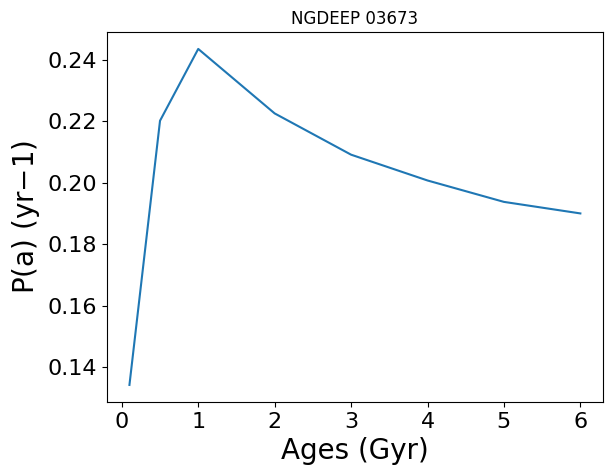

In [34]:
plt.plot(ages, np.exp(-chi/2))
plt.xlabel('Ages (Gyr)', fontsize = 20)
plt.ylabel('P(a) (yr$-1$)', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("NGDEEP 03673")

plt.savefig('fitting_graphs/0.5_1.0/NGDEEP_03673_Age',bbox_inches='tight', dpi=150)